# Student information

Full name: Lại Khánh Toàn

Student ID: 19120689

# Preparation

## Download data

In [ ]:
!wget https://raw.githubusercontent.com/ptpuyen1511/sna-lab02-wiki/master/pre_wikielec.txt

--2023-05-12 14:01:55--  https://raw.githubusercontent.com/ptpuyen1511/sna-lab02-wiki/master/pre_wikielec.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3073478 (2.9M) [text/plain]
Saving to: ‘pre_wikielec.txt’

pre_wikielec.txt    100%[===================>]   2.93M  --.-KB/s    in 0.02s   

2023-05-12 14:01:55 (176 MB/s) - ‘pre_wikielec.txt’ saved [3073478/3073478]



## Install necessary package

In [ ]:
!pip install nxviz==0.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Lab 02

## Import necessary libraries and modules

In [ ]:
import networkx as nx

import nxviz as nz
from nxviz import CircosPlot, ArcPlot
import matplotlib.pyplot as plt

# Your import libraries
import pandas as pd
import datetime
from datetime import timedelta
import time
import numpy as np

## Question 1:
Create bipartite graph from provided file ('pre_wikielec.txt' - csv format)

### Create Dataframe from csv file

In [ ]:
df = pd.read_csv('pre_wikielec.txt')

In [ ]:
df.head()

,CandidateName,VoterID,Date
0,cjcurrie,3,1095094800
1,cjcurrie,25,1095094800
2,cjcurrie,4,1095094800
3,cjcurrie,5,1095094800
4,cjcurrie,6,1095094800


### Create bipartite graph from Dataframe

In [ ]:
from networkx.algorithms import bipartite
# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(df['VoterID'], bipartite='Voter')
G.add_nodes_from(df['CandidateName'], bipartite='Candidate')

# Add in each edge along with the date the edge was created
for r, d in df.iterrows():
    G.add_edge(d['VoterID'], d['CandidateName'], date=d['Date'])


## Question 2:
Visualize the degree centrality distribution of the projected graphs

### Voter projected graph

#### Create the voter nodes projection as a graph

In [ ]:
# Get the voter partition's nodes: voter_nodes
voter_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'Voter']

# Create the voter nodes projection as a graph: G_voters
G_voters = nx.bipartite.projected_graph(G, voter_nodes)


#### Calculate the degree centrality and plot the histogram of degree centrality values (of *voter projected graph*)

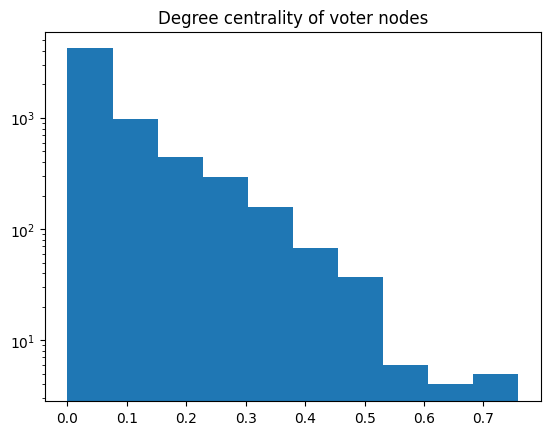

In [ ]:
# Calculate the degree centrality using nx.degree_centrality: dcs
dcs_1 = nx.degree_centrality(G_voters)

# Plot the histogram of degree centrality values
plt.hist(list(dcs_1.values()))
plt.yscale('log')  
plt.title('Degree centrality of voter nodes')
plt.show() 

### Candidate projected graph

#### Create the candidate nodes projection as a graph

In [ ]:
# Get the candidate partition's nodes: candidate_nodes
candidate_nodes = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'Candidate']

# Create the candidate nodes projection as a graph: G_candidates
G_candidates = nx.bipartite.projected_graph(G, candidate_nodes)

#### Calculate the degree centrality and plot the histogram of degree centrality values (of *candidate projected graph*)

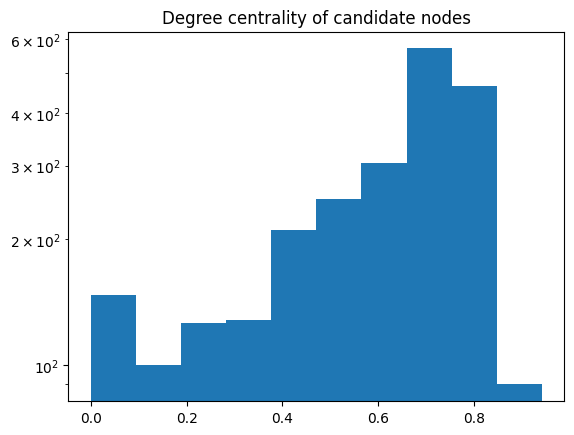

In [ ]:
# Calculate the degree centrality using nx.degree_centrality: dcs
dcs_2 = nx.degree_centrality(G_candidates)

# Plot the histogram of degree centrality values
plt.hist(list(dcs_2.values()))
plt.yscale('log')  
plt.title('Degree centrality of candidate nodes')
plt.show() 

## Question 3:
Create and display a sub graph with time filter on edges

### Create sub graph containing only votes which were voted from 2004-09-17 to 2004-09-19. Then remove all isolated nodes from sub graph

Hint:


1.   Use datetime.date to creat a date
2.   Use time.mktime(your_date.timetuple()) to creat unixtime of your_date
3.   Use nx.isolates() and Graph.remove_nodes_from()




In [ ]:
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph into G_sub
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, 
#               that the date of the edge is from 2004-09-17 to 2004-09-19.
time_2 = datetime.date(2004, 9, 19)
time_1 = datetime.date(2004, 9, 17)
t_2 = time.mktime(time_2.timetuple())
t_1 = time.mktime(time_1.timetuple())

G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if (d['date'] < t_2) & (d['date'] > t_1)])

# Remove isolated nodes from G_sub
isolate_nodes = list(nx.isolates(G_sub))

G_sub.remove_nodes_from(isolate_nodes)

### Display G_sub which you created above. Using CircosPlot object with nodes colored and grouped by their partition label.

Hint: Use parameters node_color and node_grouping for coloring and grouping.

Note: You must add label for notes.






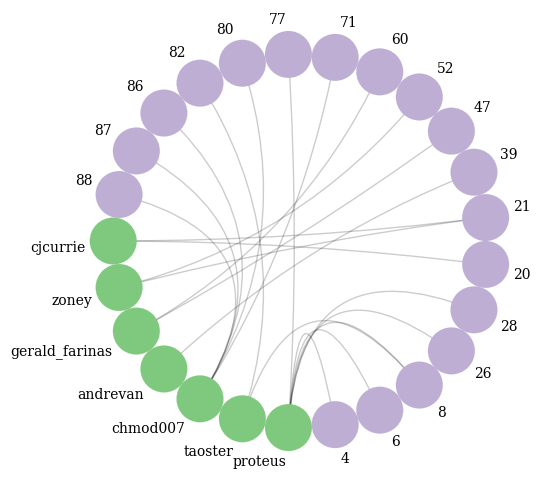

In [ ]:
# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_labels=True)

# Draw c to screen
c.draw()

# Display the plot
plt.show()

## Question 4:
Plot number of votes being made over time from 2004-10-20 to 2004-10-30 within a chunking time windows of 1 day for 2 specific candidates.

Plot number of votes with xlabel is `Days elapsed` and ylabel is `Number of votes`.

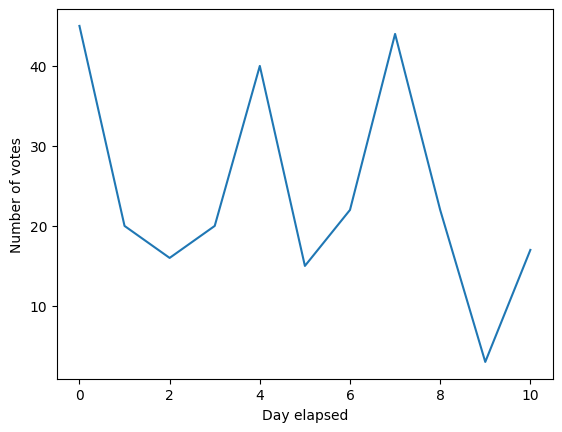

In [31]:
# Define current day and timedelta of 1 day
current_day = datetime.date(2004, 10, 20)
end_day = datetime.date(2004, 10, 30)

td = timedelta(days=1)

n_voted = []
# Count votes by day

while current_day <= end_day:
    t_1 = time.mktime(current_day.timetuple())
    t_2 = time.mktime((current_day + td).timetuple())
    n_voted.append(len([(u, v, d) for u, v, d in G.edges(data=True) if (d['date'] < t_2) & (d['date'] > t_1)]))
    current_day += td



# # Create the plot
plt.plot(n_voted)
plt.xlabel('Day elapsed')
plt.ylabel('Number of votes')
plt.show()


---
<center>THE END</center>